# IMARS Geolocation Quality Assessment
Author: Sophie Son

Purpose: To sort top parks and visualize IMARS coordinate distance bins for those parks for program- and region-level briefing 

In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [11]:
myworkingdirectory = r"C:\Users\Sophie.Kaye\DOT OST\volpe-proj-VU16A100 - Transportation Safety Program\Region Briefing"
os.chdir(myworkingdirectory)

In [12]:
df_allcoords = pd.read_excel(".//Data/Output Data/Final Coordinate Stats and Charts AllCoords No AKR.xlsx")
df_nocoords = pd.read_excel(".//Data/Output Data/Final Coordinate Stats and Charts No AKR.xlsx")
df_final = df_allcoords
df_final['No Coordinates'] = df_nocoords['No Coordinates']
df_final['Total Crashes'] = df_allcoords['Total Crashes'] + df_nocoords['No Coordinates']
df_final.to_excel(r"C:\Users\Sophie.Kaye\DOT OST\volpe-proj-VU16A100 - Transportation Safety Program\Region Briefing\Data\Output Data\Final Coordinate Stats No AKR.xlsx", sheet_name="Output Data", index = False)

In [13]:
df_final.columns=["Park","Region","Within Boundary","<1mi Out","1-10mi Out","10-100mi Out",">100mi Out","No Coordinates","Total Crashes"]
df_final = df_final.sort_values(by="Total Crashes", ascending=False)
top10 = pd.DataFrame(df_final.head(10))
top10 # 10 parks with the most crashes servicewide

,Park,Region,Within Boundary,<1mi Out,1-10mi Out,10-100mi Out,>100mi Out,No Coordinates,Total Crashes
279,NACA,NCR,602,623,36,97,25,171,1554
416,YOSE,PWR,430,11,6,4,14,853,1318
415,YELL,IMR,499,5,7,0,76,600,1187
176,GRSM,SER,683,19,2,7,49,364,1124
36,BLRI,SER,531,19,7,19,7,389,972
281,NATR,SER,455,21,22,61,52,308,919
182,GWMP,NCR,291,91,7,5,3,24,421
171,GRCA,IMR,101,1,2,1,18,193,316
235,LAKE,PWR,213,0,5,1,6,77,302
107,DEWA,NER,129,6,0,2,3,95,235


In [14]:
# determine proportion of total crashes for plotting 100% stacked bars
top10['Within Boundary'] = top10['Within Boundary']/top10['Total Crashes']
top10["<1mi Out"] = top10["<1mi Out"]/top10['Total Crashes']
top10["1-10mi Out"] = top10["1-10mi Out"]/top10['Total Crashes']
top10["10-100mi Out"] = top10["10-100mi Out"]/top10['Total Crashes']
top10[">100mi Out"] = top10[">100mi Out"]/top10['Total Crashes']
top10["No Coordinates"] = top10["No Coordinates"]/top10['Total Crashes']

# check that each row sums to 1
top10['sum'] = top10['Within Boundary'] + top10["<1mi Out"] + top10["1-10mi Out"] + top10["10-100mi Out"]+ top10[">100mi Out"] + top10["No Coordinates"]
top10

,Park,Region,Within Boundary,<1mi Out,1-10mi Out,10-100mi Out,>100mi Out,No Coordinates,Total Crashes,sum
279,NACA,NCR,0.387387,0.400901,0.023166,0.062420,0.016088,0.110039,1554,1.0
416,YOSE,PWR,0.326252,0.008346,0.004552,0.003035,0.010622,0.647193,1318,1.0
415,YELL,IMR,0.420388,0.004212,0.005897,0.000000,0.064027,0.505476,1187,1.0
176,GRSM,SER,0.607651,0.016904,0.001779,0.006228,0.043594,0.323843,1124,1.0
36,BLRI,SER,0.546296,0.019547,0.007202,0.019547,0.007202,0.400206,972,1.0
281,NATR,SER,0.495103,0.022851,0.023939,0.066376,0.056583,0.335147,919,1.0
182,GWMP,NCR,0.691211,0.216152,0.016627,0.011876,0.007126,0.057007,421,1.0
171,GRCA,IMR,0.319620,0.003165,0.006329,0.003165,0.056962,0.610759,316,1.0
235,LAKE,PWR,0.705298,0.000000,0.016556,0.003311,0.019868,0.254967,302,1.0
107,DEWA,NER,0.548936,0.025532,0.000000,0.008511,0.012766,0.404255,235,1.0


In [15]:
top10_slim = top10.drop(columns=['Park','Region','Total Crashes','sum'])

In [16]:
# Each column will take the sum of all columns before it as its base
bottom_list = []
for i in top10_slim.columns:
    b = list(top10_slim.loc[:, top10_slim.columns[0]: i].sum(axis=1))
    bottom_list.append(b)

<ipython-input-20-f7644e4fff6a>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(y) for y in y_vals])


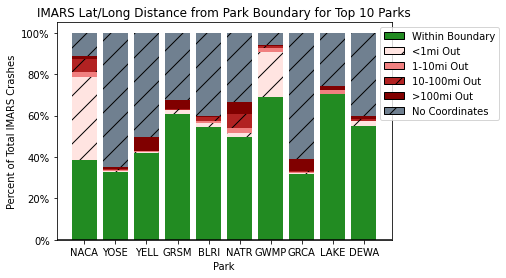

In [20]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots()

x_ax = top10['Park']

patterns = ['','/','','/','','/'] # define hatch for each bin
colorlist = ['forestgreen','mistyrose', 'lightcoral', 'firebrick', 'maroon', 'slategrey'] # define color for each bin
for i, v in enumerate(top10_slim.columns):
    if i == 0:
        # First column is at the bottom of the chart so bottom is 0 and doesn't need to be specified.
        plt.bar(x_ax, top10_slim[v], hatch=patterns[i], color=colorlist[i])
    else:
        plt.bar(x_ax, top10_slim[v], bottom=bottom_list[i - 1], hatch=patterns[i], color=colorlist[i])

ax.tick_params(axis='x', which='major')
y_vals = ax.get_yticks()
ax.set_yticklabels(['{:.0%}'.format(y) for y in y_vals])
ax.set_ylabel("Percent of Total IMARS Crashes")
ax.set_xlabel("Park")
ax.axhline(y=0, color='k')

within_patch = mpatches.Patch(hatch=patterns[0], facecolor=colorlist[0], edgecolor="black", label=top10_slim.columns[0])
one_mile_patch = mpatches.Patch(hatch=patterns[1], facecolor=colorlist[1], edgecolor="black", label=top10_slim.columns[1])
ten_mile_patch = mpatches.Patch(hatch=patterns[2], facecolor=colorlist[2], edgecolor="black", label=top10_slim.columns[2])
hundred_mile_patch = mpatches.Patch(hatch=patterns[3], facecolor=colorlist[3], edgecolor="black", label=top10_slim.columns[3])
over_hundred_mile_patch = mpatches.Patch(hatch=patterns[4], facecolor=colorlist[4], edgecolor="black", label=top10_slim.columns[4])
no_coords_patch = mpatches.Patch(hatch=patterns[5], facecolor=colorlist[5], edgecolor="black", label=top10_slim.columns[5])
ax.legend(loc="upper left", frameon=1,bbox_to_anchor=(0.95, 1), handles = [within_patch, one_mile_patch, ten_mile_patch, hundred_mile_patch, over_hundred_mile_patch, no_coords_patch])
ax.set_title('IMARS Lat/Long Distance from Park Boundary for Top 10 Parks')

plt.show()